### Exercises

#### Question 1

The accompanying file `data.csv` contains information for the value `x` of something observed at time `t`.

Given this data, we want to calculate the rate of change of this value over time - we'll do this by taking two consecutive observations, say $x(t_i)$ and $x(t_{i+1})$ and approximate the rate of change using this formula:

$$
v(t_{i+1}) = \frac{x(t_{i+1}) - x(t_i)}{t_{i+1} - t_i}
$$

For example, if the data looks like this:

```
t     x
0.1   10
0.2   12
0.4   14
0.5   15
```

Then the first row of data would be considered $t_0$, the second row $t_1$, etc

And we can start approximating the rate of change starting at $v_1$ which would be calculated as:

$$
v_1 = \frac{12 - 10}{0.2 - 0.1} = 20.0
$$

Similarly, $v_2$ would be calculated as:

$$
v_2 = \frac{14 - 12}{0.4 - 0.2} = 10.0
$$

Use NumPy arrays to create an array that holds the calculated rates of change and determine the minimum, maximum, average and standard deviation of the rate of change.

### Solution (Question 1)

**Approach (best practices):**
- Load `t` and `x` as NumPy arrays.
- Sort by time (robust if the file isn't ordered).
- Validate that times are strictly increasing (no duplicate `t`, no zero time-step).
- Use vectorized differences: `v = np.diff(x) / np.diff(t)`.
- Report summary stats. (By default, `np.std` computes population std with `ddof=0`; if you want sample std, set `ddof=1`.)

In [1]:
import numpy as np

def load_data_csv(path: str = "data.csv") -> tuple[np.ndarray, np.ndarray]:
    """Load (t, x) from a CSV.

    Expected formats:
      - With header: t,x   (any case/whitespace)
      - Without header: two columns

    Returns
    -------
    t : np.ndarray, shape (n,)
    x : np.ndarray, shape (n,)
    """
    try:
        data = np.genfromtxt(
            path,
            delimiter=",",
            names=True,
            dtype=None,
            encoding="utf-8",
            autostrip=True,
        )
        # If names=True but no header, genfromtxt returns a 1D float array; fall back.
        if data is None or (isinstance(data, np.ndarray) and data.dtype.names is None):
            raise ValueError("No header detected")
        cols = {name.strip().lower(): name for name in data.dtype.names}
        if "t" not in cols or "x" not in cols:
            raise ValueError(f"Header must include 't' and 'x'. Found: {data.dtype.names}")
        t = np.asarray(data[cols["t"]], dtype=float)
        x = np.asarray(data[cols["x"]], dtype=float)
        return t, x
    except (OSError, ValueError):
        # Fallback: assume 2 numeric columns without header
        raw = np.genfromtxt(path, delimiter=",", dtype=float, encoding="utf-8")
        if raw.ndim != 2 or raw.shape[1] < 2:
            raise ValueError("Expected at least two columns (t, x) in data.csv")
        t = np.asarray(raw[:, 0], dtype=float)
        x = np.asarray(raw[:, 1], dtype=float)
        return t, x


def ensure_sorted_and_valid(t: np.ndarray, x: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Sort by t and validate: finite, same length, >=2 points, strictly increasing t."""
    t = np.asarray(t, dtype=float).ravel()
    x = np.asarray(x, dtype=float).ravel()

    if t.shape != x.shape:
        raise ValueError(f"t and x must have the same shape. Got t={t.shape}, x={x.shape}")
    if t.size < 2:
        raise ValueError("Need at least 2 observations to compute a rate of change.")
    if not (np.isfinite(t).all() and np.isfinite(x).all()):
        raise ValueError("t and x must contain only finite numbers (no NaN/inf).")

    order = np.argsort(t)
    t_sorted = t[order]
    x_sorted = x[order]

    dt = np.diff(t_sorted)
    if np.any(dt <= 0):
        raise ValueError("t must be strictly increasing after sorting (no duplicates / no decreasing times).")

    return t_sorted, x_sorted


def rates_of_change(t: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Compute v_i for i=1..n-1 using forward differences."""
    t_sorted, x_sorted = ensure_sorted_and_valid(t, x)
    v = np.diff(x_sorted) / np.diff(t_sorted)
    return v


# Load data.csv; if it doesn't exist in your environment, fall back to the example from the prompt.
try:
    t, x = load_data_csv("data.csv")
except Exception as e:
    print("Could not load data.csv; using the example data instead.")
    print(f"Reason: {type(e).__name__}: {e}")
    t = np.array([0.1, 0.2, 0.4, 0.5], dtype=float)
    x = np.array([10.0, 12.0, 14.0, 15.0], dtype=float)

t, x = ensure_sorted_and_valid(t, x)
v = rates_of_change(t, x)

t, x, v

(array([0.092, 0.2  , 0.296, 0.39 , 0.494, 0.605, 0.699, 0.806, 0.89 ,
        1.003, 1.109, 1.195, 1.304, 1.394, 1.51 , 1.596, 1.699, 1.801,
        1.893, 2.006, 2.098, 2.193, 2.302, 2.402, 2.508, 2.599, 2.691,
        2.799, 2.893, 2.992, 3.11 , 3.196, 3.297, 3.403, 3.508, 3.606,
        3.695, 3.807, 3.909, 4.008, 4.092, 4.195, 4.308, 4.394, 4.495,
        4.599, 4.705, 4.792, 4.9  , 4.999, 5.104, 5.203, 5.301, 5.409,
        5.5  , 5.6  , 5.706, 5.804, 5.892, 6.   , 6.102, 6.207, 6.298,
        6.409, 6.505, 6.608, 6.702, 6.796, 6.901, 7.   , 7.107, 7.198,
        7.291, 7.392, 7.507, 7.61 , 7.708, 7.808, 7.895, 8.006, 8.093,
        8.205, 8.291, 8.394, 8.492, 8.598, 8.705, 8.803, 8.905, 9.002,
        9.096, 9.193, 9.307, 9.393, 9.5  , 9.607, 9.702, 9.796, 9.9  ,
        9.992]),
 array([ 14.76567497,  20.25922692,  25.24636471,  28.59196014,
         35.58387515,  39.9240561 ,  44.900143  ,  50.11199871,
         55.33744839,  61.13682148,  64.50045247,  69.43382286,
         7

In [2]:
def summary_stats(arr: np.ndarray, *, ddof: int = 0) -> dict[str, float]:
    arr = np.asarray(arr, dtype=float).ravel()
    if arr.size == 0:
        raise ValueError("Array is empty.")
    return {
        "min": float(np.min(arr)),
        "max": float(np.max(arr)),
        "mean": float(np.mean(arr)),
        "std": float(np.std(arr, ddof=ddof)),
    }

stats_pop = summary_stats(v, ddof=0)   # population std (NumPy default)
stats_samp = summary_stats(v, ddof=1)  # sample std (often used in stats)

print("Rates of change v (aligned with intervals [t_i -> t_{i+1}]):")
print(v)
print("\nSummary (population std, ddof=0):")
for k, val in stats_pop.items():
    print(f"  {k:>4}: {val:.6g}")
print("\nSummary (sample std, ddof=1):")
for k, val in stats_samp.items():
    print(f"  {k:>4}: {val:.6g}")

Rates of change v (aligned with intervals [t_i -> t_{i+1}]):
[50.86622176 51.94935197 35.59144075 67.22995203 39.1007292  52.93709476
 48.7089318  62.20773438 51.32188572 31.73236779 57.36477206 53.03182065
 60.73281476 43.1915111  57.94411504 34.83306963 57.73255581 42.08891533
 57.98542428 38.32023478 67.48615221 48.093643   42.31323664 53.71244492
 47.40536029 56.94238226 34.93056181 69.07300506 34.25537804 50.61200384
 47.3108194  60.68569144 47.95527183 52.66924298 39.17350419 62.6727992
 47.34774089 51.06091262 44.84522578 57.78944777 40.05894433 59.18939376
 49.93942905 44.04063203 53.8329408  44.59051897 54.01930861 57.62888975
 42.55131646 43.3626037  66.71151349 32.38972102 58.07364049 51.45280885
 48.63115874 50.34830522 44.42223678 46.13926723 61.21598928 43.69435355
 46.52295121 61.16976936 45.07897815 60.60440737 33.92767856 59.26966689
 46.00648977 61.93828733 46.22600595 46.02387813 43.85041604 55.0149288
 47.4935812  45.73946497 47.67676662 52.02385934 48.45784868 52.2

#### Question 2

In linear regression we try to find the coefficients `m` (slope) and `c` (y-intercept) of a straight line

$$
y = mx + c
$$

that provides the "best" fit given some `x` and `y` data. This formula then allows to predict `y` values for given `x` values.

Given an array of `n` `(x, y)` data pairs, these coefficients can be calculated very simply.

A bit of terminology first:

- Let `X` mean the column of `X` values.
- Let `Y` mean the column of `Y` values.
- Let `XX` mean a column calculated by multiplying each `x` in the `X` column by itself
- Let `XY` mean a column calculated by multiplying the `x` and `y` values from the `X` and `Y` columns

Then, given some column (say `X`), this symbol: $\sum{X}$ means the sum of all the elements in the column.

Similarly, the symbol $\sum{XY}$ means the sum of the values obtained by multiplying (pairwise) the values in `X` and `Y`.

Given those definitions, the formulas for calculating the "best" values of `m` and `c` are given by:

$$
m = \frac{n\sum{XY} - \sum{X}\sum{Y}}{n\sum{XX} - (\sum{X})^2}
$$

$$
c = \frac{\sum{Y}\sum{XX} - \sum{X}\sum{XY}}{n\sum{XX} - (\sum{X})^2}
$$

(where `n` is the number of `(x,y)` pairs in our data set.)

Using the same data we saw in Question 1, calculate the values for `m` and `c` for that data set given the formulas above.

You can think of the `t` column in the data as the `X` column, and the `x` values in the data as the `Y` column - we are trying to predict the value of `x` given a value of `t`.

This will result in a straight line that "best" fits through the data.

Compare the slope of this regression line to the average rate of change you calculated in Question 1.

### Solution (Question 2)

**Approach (best practices):**
- Treat `t` as `X` and `x` as `Y`.
- Compute the required sums with NumPy.
- Guard against a zero denominator (degenerate case: all `t` equal).
- (Optional verification) Compare with `np.polyfit`.
- Compare the regression slope `m` to the mean of the discrete rates of change from Question 1.

In [3]:
def linear_regression_m_c(X: np.ndarray, Y: np.ndarray) -> tuple[float, float]:
    """Compute (m, c) via the provided closed-form formulas."""
    X = np.asarray(X, dtype=float).ravel()
    Y = np.asarray(Y, dtype=float).ravel()
    if X.shape != Y.shape:
        raise ValueError("X and Y must have the same shape.")
    n = X.size
    if n < 2:
        raise ValueError("Need at least 2 points for regression.")

    sumX = np.sum(X)
    sumY = np.sum(Y)
    sumXX = np.sum(X * X)
    sumXY = np.sum(X * Y)

    denom = n * sumXX - (sumX ** 2)
    if np.isclose(denom, 0.0):
        raise ValueError("Degenerate regression: denominator is zero (X has no variation).")

    m = (n * sumXY - sumX * sumY) / denom
    c = (sumY * sumXX - sumX * sumXY) / denom
    return float(m), float(c)


m, c = linear_regression_m_c(t, x)
m, c

(49.978008206387344, 10.081268844890284)

In [4]:
# Compare to Question 1 mean rate of change
mean_v = float(np.mean(v))

print(f"Regression line: x(t) = m*t + c")
print(f"  m (slope)     = {m:.10g}")
print(f"  c (intercept) = {c:.10g}")

print("\nDiscrete rates of change (Question 1):")
print(f"  mean(v)       = {mean_v:.10g}")
print(f"  |m - mean(v)| = {abs(m - mean_v):.10g}")

# Optional verification with NumPy's polyfit (degree 1)
m_pf, c_pf = np.polyfit(t, x, 1)
print("\nVerification (np.polyfit degree=1):")
print(f"  m_polyfit     = {m_pf:.10g}")
print(f"  c_polyfit     = {c_pf:.10g}")
print(f"  max(|Δ|)      = {max(abs(m - m_pf), abs(c - c_pf)):.10g}")

Regression line: x(t) = m*t + c
  m (slope)     = 49.97800821
  c (intercept) = 10.08126884

Discrete rates of change (Question 1):
  mean(v)       = 49.98125179
  |m - mean(v)| = 0.003243581094

Verification (np.polyfit degree=1):
  m_polyfit     = 49.97800821
  c_polyfit     = 10.08126884
  max(|Δ|)      = 2.87769808e-13


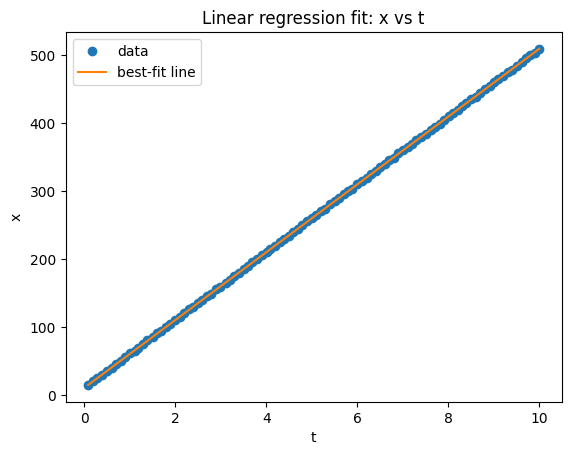

In [5]:
# Optional: visualize the fit
import matplotlib.pyplot as plt

t_line = np.linspace(t.min(), t.max(), 200)
x_line = m * t_line + c

plt.figure()
plt.plot(t, x, "o", label="data")
plt.plot(t_line, x_line, "-", label="best-fit line")
plt.xlabel("t")
plt.ylabel("x")
plt.title("Linear regression fit: x vs t")
plt.legend()
plt.show()